In [45]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
stock = '^NYA'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7184.979980,7331.120117,7184.979980,7326.740234,7326.740234,3991400000
2010-01-05,7326.740234,7359.459961,7313.600098,7354.870117,7354.870117,2491020000
2010-01-06,7354.850098,7389.279785,7342.490234,7377.700195,7377.700195,4972660000
2010-01-07,7377.700195,7398.209961,7325.509766,7393.930176,7393.930176,5270680000
2010-01-08,7393.930176,7426.410156,7367.810059,7425.350098,7425.350098,4389590000


In [47]:
price = data['Close']
price

Date
2010-01-04     7326.740234
2010-01-05     7354.870117
2010-01-06     7377.700195
2010-01-07     7393.930176
2010-01-08     7425.350098
                  ...     
2023-05-12    15246.360352
2023-05-15    15322.559570
2023-05-16    15129.250000
2023-05-17    15313.919922
2023-05-18    15345.429688
Name: Close, Length: 3367, dtype: float64

<Axes: xlabel='Date'>

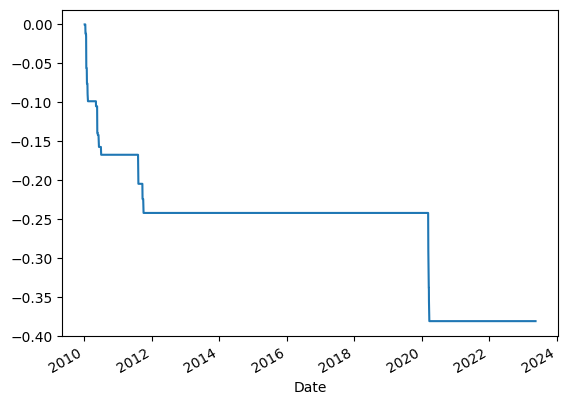

In [48]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [49]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")


Maximum Drawdown for the given period is: -38.114249520969224 %


In [50]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00383934,  0.00310408, ..., -0.01261601,
        0.01220615,  0.00205759])

In [51]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00383934, 1.00695534, ..., 2.06493604, 2.09014097,
       2.09444162])

In [52]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 209.44416202315344%


In [53]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.061149
2012-12-31    0.129260
2013-12-31    0.231753
2014-12-31    0.042203
2015-12-31   -0.064195
2016-12-31    0.090056
2017-12-31    0.158448
2018-12-31   -0.111989
2019-12-31    0.223189
2020-12-31    0.043971
2021-12-31    0.181712
2022-12-31   -0.115346
2023-12-31    0.010611
Freq: A-DEC, Name: Close, dtype: float64

In [54]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.021973
2010-03-31    0.058672
2010-04-30    0.003572
2010-05-31   -0.091356
                ...   
2023-01-31    0.056116
2023-02-28   -0.037878
2023-03-31   -0.003504
2023-04-30    0.011120
2023-05-31   -0.012894
Freq: M, Name: Close, Length: 161, dtype: float64

In [55]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 5.834799883124128%


In [56]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : -2.7052701586818566


In [57]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.091356
2010-06-30   -0.047400
2010-08-31   -0.042126
2010-11-30   -0.010968
2011-03-31   -0.003978
                ...   
2022-09-30   -0.089794
2022-12-31   -0.037751
2023-02-28   -0.037878
2023-03-31   -0.003504
2023-05-31   -0.012894
Name: Close, Length: 62, dtype: float64

In [58]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: -3.628101980676332
